# Integrated Predictive Analytics and Machine Learning for Enhanced Wildfire Risk Assessment in Alberta


## Data Loading

First, let's grab the information from the file named `wildfire_data.csv` and put it into a variable called `'data'` using `pandas`.


In [1]:
# import the necessary packages
import pandas as pd

# load the data
data = None

# Read CSV file using pandas
data = pd.read_csv('Data/wildfire_data.csv')

data.head(3)

D:\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,CWF001,NaN,0.01,A,49.410191,-114.318843,Provincial Park,Power Line Industry,NaN,...,NaN,NaN,1/13/2021 13:25,0.01,1/13/2021 13:25,0.01,NaN,NaN,1/13/2021 13:35,0.01
1,2021,CWF002,NaN,0.01,A,49.587753,-114.378655,Provincial Land,Recreation,NaN,...,NaN,NaN,1/29/2021 10:45,0.01,1/29/2021 10:45,0.01,NaN,NaN,1/29/2021 13:15,0.01
2,2021,CWF003,NaN,0.05,A,51.119500,-114.778950,Provincial Land,Resident,NaN,...,NaN,NaN,2/23/2021 10:42,0.05,2/23/2021 10:42,0.05,NaN,NaN,2/23/2021 10:52,0.05


In [2]:
# List of columns to be removed
columns_to_remove = ['fire_number', 'fire_name', 'size_class', 'industry_identifier_desc', 'responsible_group_desc', 'det_agent', 'det_agent_type', 'discovered_size', 'dispatched_resource', 'dispatch_date', 'assessment_resource', 'assessment_datetime', 'ia_access', 'bucketing_on_fire', 'first_bucket_drop_date', 'distance_from_water_source', 'bh_fs_date', 'bh_hectares', 'uc_fs_date', 'uc_hectares', 'to_fs_date', 'to_hectares', 'ex_fs_date', 'ex_hectares']

# Removing the specified columns
data_cleaned = data.drop(columns=columns_to_remove)

# Dropping rows with missing values in the remaining columns of the dataset
data_cleaned = data_cleaned.dropna()


data_cleaned.drop_duplicates(inplace=True)
data_cleaned.reset_index(drop=True, inplace=True)

data_cleaned.head()


,fire_year,current_size,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,activity_class,true_cause,fire_start_date,discovered_date,...,weather_conditions_over_fire,temperature,relative_humidity,wind_direction,wind_speed,fuel_type,initial_action_by,ia_arrival_at_fire_date,fire_fighting_start_date,fire_fighting_start_size
0,2021,0.01,49.410191,-114.318843,Provincial Park,Power Line Industry,Operations,Line Impact,1/13/2021 10:30,1/13/2021 11:35,...,Cloudy,4.0,65.0,W,30.0,C7,FPD Staff,1/13/2021 13:20,1/13/2021 13:25,0.01
1,2021,0.01,50.403817,-114.496917,Indian Reservation,Resident,Refuse Disposal,Unsafe Fire,7/4/2021 0:00,7/4/2021 1:30,...,Rainshowers,13.0,70.0,CLM,0.0,M2,FPD Staff,7/4/2021 3:22,7/4/2021 3:22,0.01
2,2021,29.60,53.752683,-116.657933,Provincial Land,Forest Industry,Debris Disposal,Unsafe Fire,4/16/2021 13:30,4/16/2021 13:50,...,Clear,23.0,18.0,SE,3.0,M1,HAC,4/16/2021 14:12,4/16/2021 14:27,0.30
3,2021,8.05,53.600200,-116.201400,Private Land,Agriculture Industry,Operations,Burning Substance,4/17/2021 14:13,4/17/2021 14:18,...,Clear,19.8,20.0,E,7.0,O1b,HAC,4/17/2021 14:35,4/17/2021 14:42,4.00
4,2021,479.30,53.414000,-115.785417,Provincial Land,Recreation,Cooking and Warming,Unsafe Fire,4/30/2021 11:00,4/30/2021 11:23,...,Clear,18.0,22.0,W,10.0,C3,HAC,4/30/2021 11:42,4/30/2021 12:03,10.00


In [3]:
# pip install mlxtend

## 1:Finding the most common reasons of wildfire.

Visualizing the most common causes of fires in a dataset by plotting a bar chart

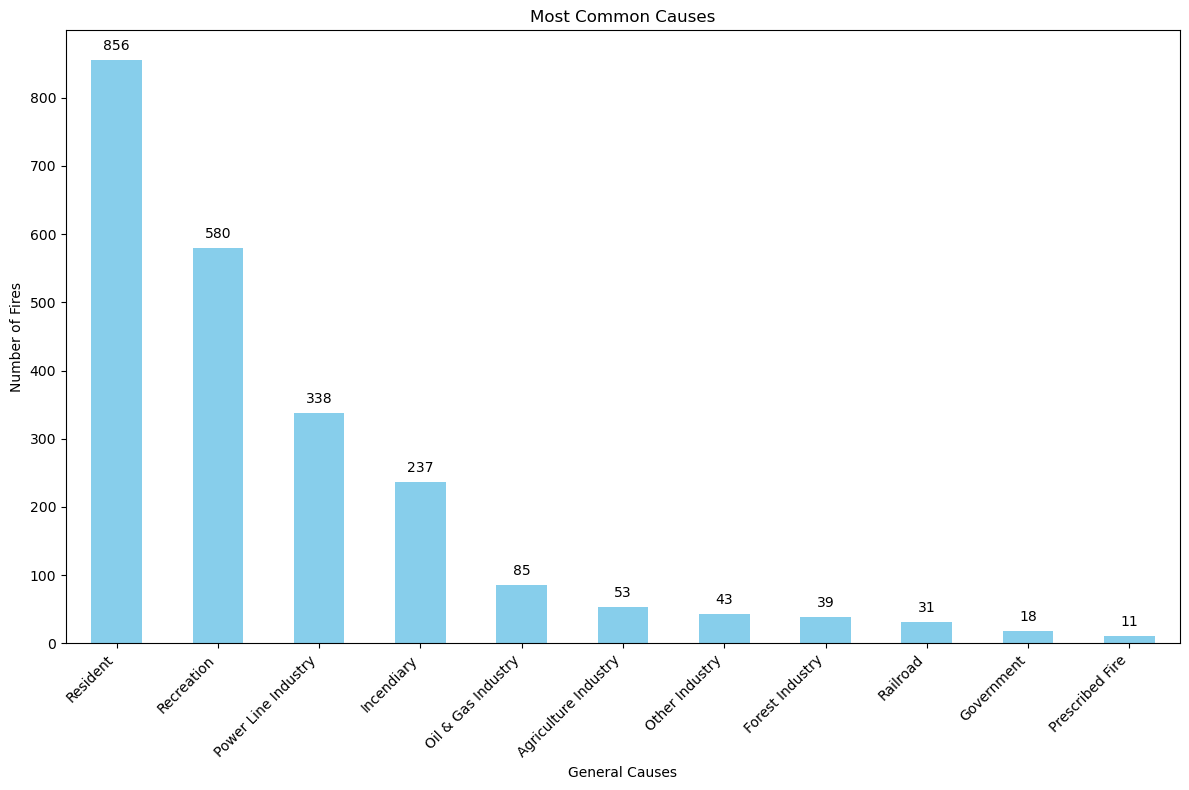

In [4]:
# Import the necessary package for plotting
import matplotlib.pyplot as plt
# Optionally, you can use seaborn for enhanced plot styling
# import seaborn as sns         

# Group the cleaned data by 'general_cause_desc' to aggregate similar causes and count occurrences
grouped_data = data_cleaned.groupby('general_cause_desc').size()

# Sort the aggregated data in descending order to highlight the most common causes of fires
general_causes = grouped_data.sort_values(ascending=False)

# Create a figure with a specified size to ensure the plot is large enough to be easily readable
plt.figure(figsize=(12, 8))
# Plot the sorted data as a bar chart with bars colored in sky blue
bars = general_causes.plot(kind='bar', color='skyblue')
# Set the title of the chart to 'Most Common Causes'
plt.title('Most Common Causes')
# Label the x-axis as 'General Causes' to indicate what the bars represent
plt.xlabel('General Causes')
# Label the y-axis as 'Number of Fires' to show the metric being measured
plt.ylabel('Number of Fires')
# Rotate the x-axis labels 45 degrees to the right for better legibility
plt.xticks(rotation=45, ha='right')

# Iterate through each bar to add an annotation displaying its height (the count of fires)
for bar in bars.patches:
    # Format the annotation text as an integer and position it above the bar
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 10),
                 textcoords='offset points')

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
# Display the plot
plt.show()


## Convert Data to Transaction Format
In this step, we will prepare the data for the Fire Size Analysis with its general cause. Then, we will use the Apriori algorithm to find the most frequent itemsets in the data.

In [5]:
import pandas as pd

# Group the cleaned fire data by 'general_cause_desc' and 'current_size', then count occurrences in each group
fire_size_reasons = data_cleaned.groupby(['general_cause_desc', 'current_size']).size()

# Reshape the data to have 'general_cause_desc' as columns, 'current_size' as rows, 
# and the count of occurrences as values, filling missing values with 0
fire_size_reasons = fire_size_reasons.unstack(level='general_cause_desc', fill_value=0)

# Convert all positive counts to 1 to indicate presence of the cause in that size category, 
# keeping 0 as is to indicate absence. This is preparation for binary representation needed for Apriori.
fire_size_reasons = fire_size_reasons.applymap(lambda x: 1 if x > 0 else 0)

# Sort the DataFrame in descending order based on all columns to prioritize the most common combinations of cause and size
fire_size_reasons = fire_size_reasons.sort_values(by=list(fire_size_reasons.columns), ascending=[False]*len(fire_size_reasons.columns))


# This statement attempts to sort 'fire_size_reasons' by 'current_size' in descending order, 
fire_size_reasons = fire_size_reasons.sort_values(by='current_size', ascending=False)

# Display the first few rows of the prepared DataFrame to verify the format and sorting
fire_size_reasons.head()


C:\Users\Zunera Zaidi\AppData\Local\Temp\ipykernel_16464\2283237003.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fire_size_reasons = fire_size_reasons.applymap(lambda x: 1 if x > 0 else 0)


general_cause_desc,Agriculture Industry,Forest Industry,Government,Incendiary,Oil & Gas Industry,Other Industry,Power Line Industry,Prescribed Fire,Railroad,Recreation,Resident
current_size,,,,,,,,,,,
87659.4,0,0,0,0,0,0,1,0,0,0,0
31997.0,0,0,0,0,1,0,0,0,0,0,0
17472.9,0,1,0,0,0,0,0,0,0,0,0
14554.3,0,0,0,0,0,1,0,0,0,0,0
5453.4,0,0,0,0,0,0,1,0,0,0,0


## Apply Apriori Algorithm

Applying Apriori Algorithm from mlxtend.frequent_patterns to find frequent itemsets.

In [6]:
from mlxtend.frequent_patterns import apriori

# The DataFrame 'fire_size_reasons' is converted to a boolean type.
# This is necessary for the Apriori algorithm, as it works with binary data,
# indicating the presence (True) or absence (False) of an item in each transaction.
fire_size_reasons = fire_size_reasons.astype(bool)

# Apply the Apriori algorithm to the boolean DataFrame.
# The 'min_support' parameter is set to 0.02, meaning only itemsets appearing in at least 2% of transactions
# will be considered. 'use_colnames=True'
frequent_itemsets = apriori(fire_size_reasons, min_support=0.02, use_colnames=True, low_memory=True)

# Display the found frequent itemsets, sorted by their support in descending order.
# The 'support' value indicates how frequently each itemset appears in the dataset,
# with higher values signifying more common itemsets.
frequent_itemsets.sort_values(by='support', ascending=False)


,support,itemsets
10,0.482659,(Resident)
9,0.355491,(Recreation)
6,0.274566,(Power Line Industry)
3,0.164740,(Incendiary)
51,0.156069,"(Recreation, Resident)"
...,...,...
157,0.020231,"(Oil & Gas Industry, Other Industry, Power Lin..."
231,0.020231,"(Other Industry, Resident, Power Line Industry..."
230,0.020231,"(Other Industry, Power Line Industry, Recreati..."
158,0.020231,"(Oil & Gas Industry, Other Industry, Agricultu..."


## Exploring DataFrame with 3 different support thresholds

In [7]:
frequent_itemsets_1 = None
frequent_itemsets_2 = None
frequent_itemsets_3 = None

# Setting minimum support to 0.1 and find frequent itemsets with a initialized minimum support using Apriori algorithm
min_support_1 = 0.1
frequent_itemsets_1 = apriori(fire_size_reasons, min_support=min_support_1, use_colnames=True)

# Setting minimum support to 0.15 and find frequent itemsets with a initialized minimum support using Apriori algorithm
min_support_2 = 0.15
frequent_itemsets_2 = apriori(fire_size_reasons, min_support=min_support_2, use_colnames=True)

# Setting minimum support to 0.25 and find frequent itemsets with a initialized minimum support using Apriori algorithm
min_support_3 = 0.25
frequent_itemsets_3 = apriori(fire_size_reasons, min_support=min_support_3, use_colnames=True)

In [8]:
######### This is a test-cell that print the frequent itemsets 1 #########

frequent_itemsets_1

,support,itemsets
0,0.164740,(Incendiary)
1,0.118497,(Oil & Gas Industry)
2,0.274566,(Power Line Industry)
3,0.355491,(Recreation)
4,0.482659,(Resident)
5,0.104046,"(Power Line Industry, Recreation)"
6,0.121387,"(Power Line Industry, Resident)"
7,0.156069,"(Recreation, Resident)"


In [9]:
######### This is a test-cell that print the frequent itemsets 2 #########

frequent_itemsets_2

,support,itemsets
0,0.164740,(Incendiary)
1,0.274566,(Power Line Industry)
2,0.355491,(Recreation)
3,0.482659,(Resident)
4,0.156069,"(Recreation, Resident)"


In [10]:
######### This is a test-cell that print the frequent itemsets 3 #########

frequent_itemsets_3

,support,itemsets
0,0.274566,(Power Line Industry)
1,0.355491,(Recreation)
2,0.482659,(Resident)


#### Explanation:

  We can see that the most frequent reasons are  Power Line Industry , Recreation and Residents  when threshold is set to 0.1, 0.15 and 0.25. The support value for the Power Line Industry is 0.274566 , Recreation is 0.355491 and Residents 0.482659   which means these are 27.54%(Power Line Industry) , 35.54%(Recreation) and 48.26%(Residents) that are the causes of all Wildfires. 

## Generate Association Rules.

After identifying frequent itemsets, genertaing association rules using the association_rules function

In [11]:
from mlxtend.frequent_patterns import association_rules

rules  = None

# Generate the rules with support metric and minimimum threshold 0.08
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.08)

# Display the dataframe
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Incendiary),(Recreation),0.164740,0.355491,0.095376,0.578947,1.628584,0.036812,1.530708,0.462095
1,(Recreation),(Incendiary),0.355491,0.164740,0.095376,0.268293,1.628584,0.036812,1.141522,0.598859
2,(Incendiary),(Resident),0.164740,0.482659,0.098266,0.596491,1.235844,0.018753,1.282106,0.228475
3,(Resident),(Incendiary),0.482659,0.164740,0.098266,0.203593,1.235844,0.018753,1.048785,0.368879
4,(Power Line Industry),(Recreation),0.274566,0.355491,0.104046,0.378947,1.065982,0.006440,1.037768,0.085325
5,(Recreation),(Power Line Industry),0.355491,0.274566,0.104046,0.292683,1.065982,0.006440,1.025613,0.096039
6,(Power Line Industry),(Resident),0.274566,0.482659,0.121387,0.442105,0.915979,-0.011135,0.927309,-0.112253
7,(Resident),(Power Line Industry),0.482659,0.274566,0.121387,0.251497,0.915979,-0.011135,0.969179,-0.150604
8,(Recreation),(Resident),0.355491,0.482659,0.156069,0.439024,0.909595,-0.015512,0.922217,-0.133607
9,(Resident),(Recreation),0.482659,0.355491,0.156069,0.323353,0.909595,-0.015512,0.952504,-0.161156


## Visualizing itemset support 
Heatmaps help us understand a large number of rules between a small number of antecedents and consequents

In [12]:
# Convert the frozensets into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Display the first 5 rows of the dataframe
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Incendiary,Recreation,0.164740,0.355491,0.095376,0.578947,1.628584,0.036812,1.530708,0.462095
1,Recreation,Incendiary,0.355491,0.164740,0.095376,0.268293,1.628584,0.036812,1.141522,0.598859
2,Incendiary,Resident,0.164740,0.482659,0.098266,0.596491,1.235844,0.018753,1.282106,0.228475
3,Resident,Incendiary,0.482659,0.164740,0.098266,0.203593,1.235844,0.018753,1.048785,0.368879
4,Power Line Industry,Recreation,0.274566,0.355491,0.104046,0.378947,1.065982,0.006440,1.037768,0.085325


In [13]:
# Create a pivot table for the rules
pivot_rules = rules.pivot_table(index='consequents', columns='antecedents', values='support')
# Display the rows of the dataframe
pivot_rules

antecedents,Incendiary,"Incendiary,Recreation","Incendiary,Resident",Power Line Industry,"Power Line Industry,Recreation","Power Line Industry,Resident",Recreation,"Recreation,Resident",Resident
consequents,,,,,,,,,
Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,0.095376,0.080925,0.098266
"Incendiary,Recreation",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080925
"Incendiary,Resident",NaN,NaN,NaN,NaN,NaN,NaN,0.080925,NaN,NaN
Power Line Industry,NaN,NaN,NaN,NaN,NaN,NaN,0.104046,0.083815,0.121387
"Power Line Industry,Recreation",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083815
"Power Line Industry,Resident",NaN,NaN,NaN,NaN,NaN,NaN,0.083815,NaN,NaN
Recreation,0.095376,NaN,0.080925,0.104046,NaN,0.083815,NaN,NaN,0.156069
"Recreation,Resident",0.080925,NaN,NaN,0.083815,NaN,NaN,NaN,NaN,NaN
Resident,0.098266,0.080925,NaN,0.121387,0.083815,NaN,0.156069,NaN,NaN


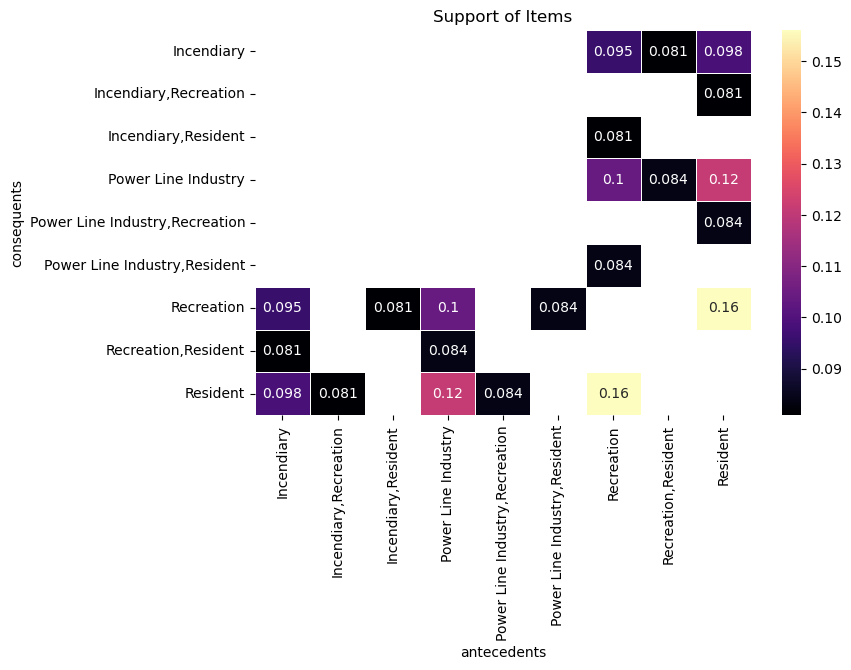

In [14]:
import seaborn as sns

# Plot the pivot table
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_rules, annot=True, cmap="magma", linewidths=0.5)
plt.title("Support of Items")
plt.show()

## Exploring Geographic Patterns

### Loading Alberta Cities Data

In [15]:
#!pip install geopandas
import geopandas as gpd
import os

# Read the Alberta Cities csv file using GeoPandas
alberta_cities = gpd.read_file(os.path.join('Data', "AlbertaCities.csv"))

### Creating a GeoDataFrame for Alberts Cities Data with Shapely and GeoPandas


In [16]:
from shapely.geometry import Point

# create a geometry column
cities_geometry = None

# Create a GeoDataFrame
cities_gdf_data = None

# Creates a list of Point geometries from longitude and latitude coordinates
cities_geometry = [Point(coords) for coords in zip(alberta_cities['lng'], alberta_cities['lat'])]

# Creates a GeoDataFrame from alberta cities data and the generated geometry column
cities_gdf_data = gpd.GeoDataFrame(alberta_cities, geometry=cities_geometry, crs=4326)

# Display the Alberta Cities GeoDataframe Data
cities_gdf_data.head(3)

,city,city_ascii,province_id,province_name,lat,lng,population,density,timezone,ranking,postal,id,geometry
0,Calgary,Calgary,AB,Alberta,51.05,-114.0667,1306784,1592.4,America/Edmonton,1,T1Y T2H T2K T2J T2M T2L T2N T2A T2C T2B T2E T2...,1124690423,POINT (-114.06670 51.05000)
1,Edmonton,Edmonton,AB,Alberta,53.5344,-113.4903,1151635,1320.4,America/Edmonton,1,T5X T5Y T5Z T5P T5R T5S T5T T5V T5W T5H T5J T5...,1124290735,POINT (-113.49030 53.53440)
2,Red Deer,Red Deer,AB,Alberta,52.2681,-113.8111,100844,966.5,America/Edmonton,2,T4S T4R T4P T4N,1124404130,POINT (-113.81110 52.26810)


### Data Cleaning for Alberta Cities Data

In [17]:
columns_to_remove = ['city_ascii', 'postal', 'id']
# Removing the specified columns
cities_data_cleaned = cities_gdf_data.drop(columns=columns_to_remove)

# Dropping rows with missing values in the remaining columns of the dataset
cities_data_cleaned = cities_data_cleaned.dropna()

cities_data_cleaned.drop_duplicates(inplace=True)
cities_data_cleaned.reset_index(drop=True, inplace=True)

cities_data_cleaned.head(3)

,city,province_id,province_name,lat,lng,population,density,timezone,ranking,geometry
0,Calgary,AB,Alberta,51.05,-114.0667,1306784,1592.4,America/Edmonton,1,POINT (-114.06670 51.05000)
1,Edmonton,AB,Alberta,53.5344,-113.4903,1151635,1320.4,America/Edmonton,1,POINT (-113.49030 53.53440)
2,Red Deer,AB,Alberta,52.2681,-113.8111,100844,966.5,America/Edmonton,2,POINT (-113.81110 52.26810)


###  Showing the Alberta Cities and Fire Data on Folium Map

In [18]:
import folium
from folium.plugins import MarkerCluster

# Create a folium map
m = folium.Map(location=[55.0000, -115.0000], zoom_start=5)

# Iterate through each row in the 'cities_data_cleaned' GeoDataFrame
for idx, row in cities_data_cleaned.iterrows():
    # Add a CircleMarker for each city in the DataFrame
    folium.CircleMarker(
        location=[row['lat'], row['lng']], # Set the location of the marker to the city's latitude and longitude
        radius=7, # Set the radius of the circle marker
        popup=row['city'], # Display the city's name in a popup on click
        color='purple', # Set the color of the circle's border
        fill=True, # Enable filling the circle with color
        fill_color='purple', # Set the fill color of the circle
        fill_opacity=0.6 # Set the opacity of the fill color
    ).add_to(m)  # Add the CircleMarker to the map 'm'

# Add fire data to the map using a MarkerCluster
fire_cluster = MarkerCluster().add_to(m)

# Select the first 1000 customer data points
fire_data = data_cleaned.head(1000)

# Iterate through each row in the 'fire_data' DataFrame
for index, row in fire_data.iterrows():
    # Add a Marker for each fire location in the DataFrame
    folium.Marker(
        location=[row['fire_location_latitude'], row['fire_location_longitude']],  # Set the marker's location to the fire's latitude and longitude
        popup=f'Fire Location: {row["current_size"]} hectares',  # Display a popup with the fire's location and size in hectares
        icon=folium.Icon(color='red', icon='fire')  # Set the marker icon to a red 'fire' icon for visual distinction
    ).add_to(fire_cluster)  # Add the Marker to the 'fire_cluster', a MarkerCluster object to group markers

# Display the map
m

### Creating a GeoDataFrame for Fire Data with Shapely and GeoPandas

In [19]:
# import the necessary packages
from shapely.geometry import Point

# create a geometry column
fires_geometry = None

# create a GeoDataFrame
fire_gdf_data = None

# Creates a list of Point geometries from longitude and latitude coordinates
fires_geometry = [Point(coords) for coords in zip(fire_data['fire_location_longitude'], fire_data['fire_location_latitude'])]

# Creates a GeoDataFrame from fire data and the generated geometry column
fire_gdf_data = gpd.GeoDataFrame(fire_data, geometry=fires_geometry, crs=4326)

# Display the Fire GeoDataframe Data
fire_gdf_data.head(3)

,fire_year,current_size,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,activity_class,true_cause,fire_start_date,discovered_date,...,temperature,relative_humidity,wind_direction,wind_speed,fuel_type,initial_action_by,ia_arrival_at_fire_date,fire_fighting_start_date,fire_fighting_start_size,geometry
0,2021,0.01,49.410191,-114.318843,Provincial Park,Power Line Industry,Operations,Line Impact,1/13/2021 10:30,1/13/2021 11:35,...,4.0,65.0,W,30.0,C7,FPD Staff,1/13/2021 13:20,1/13/2021 13:25,0.01,POINT (-114.31884 49.41019)
1,2021,0.01,50.403817,-114.496917,Indian Reservation,Resident,Refuse Disposal,Unsafe Fire,7/4/2021 0:00,7/4/2021 1:30,...,13.0,70.0,CLM,0.0,M2,FPD Staff,7/4/2021 3:22,7/4/2021 3:22,0.01,POINT (-114.49692 50.40382)
2,2021,29.60,53.752683,-116.657933,Provincial Land,Forest Industry,Debris Disposal,Unsafe Fire,4/16/2021 13:30,4/16/2021 13:50,...,23.0,18.0,SE,3.0,M1,HAC,4/16/2021 14:12,4/16/2021 14:27,0.30,POINT (-116.65793 53.75268)


### Displaying CRS of Fire GeoDataframe and Alberta Cities Dataframe 

In [20]:
print("CRS for cities_data_cleaned:", cities_data_cleaned.crs)
print("CRS for fire_gdf_data:", fire_gdf_data.crs)

CRS for cities_data_cleaned: EPSG:4326
CRS for fire_gdf_data: EPSG:4326
